In [16]:
# Import packages
import glob
import matplotlib.pyplot as plt
import os
import xarray

# Define data directories dependent on home environment (replace with your data directory file path(s))
if os.getenv('HOME') == '/home/jovyan':
    DATA_DIR = '/home/jovyan/data_dir'
    SCRIPT_DIR = '/home/jovyan/repos_my/script_dir'
    OUTPUT_DIR = '/home/jovyan/1_outlines_candidates/output/'
elif os.getenv('HOME') == '/Users/Wilson': 
    DATA_DIR = '/Users/Wilson/Documents/data'
    # DATA_DIR = '/Volumes/ExtremeSSD/data'
    SCRIPT_DIR = '/Users/Wilson/Documents/0-code/repos_my/script_dir'
    OUTPUT_DIR = '/Users/Wilson/Documents/0-code/1_outlines_candidates/output'

In [13]:
# Specify the directory containing the NetCDF files
directory = DATA_DIR + '/altimetry/CryoSat2/CS2_SARIn_CryoTEMPO/Antarctica/*.nc'
# Get a list of all NetCDF file paths in the directory
file_paths = glob.glob(directory)
# Create an empty list to store the individual datasets
datasets = []
# Iterate over each file path
for file_path in file_paths:
    # Open the NetCDF file as an xarray dataset
    dataset = xarray.open_dataset(file_path)
    # Append the dataset to the list
    datasets.append(dataset)
# Combine the individual datasets into a single dataset
CS2SARIn_elev = xarray.concat(datasets, dim="time")
# View dataset
CS2SARIn_elev

<xarray.Dataset>
Dimensions:    (x: 2750, y: 2350, time: 148, nv: 2)
Coordinates:
  * x          (x) float64 -2.699e+06 -2.697e+06 ... 2.797e+06 2.799e+06
  * y          (y) float64 -2.399e+06 -2.397e+06 ... 2.297e+06 2.299e+06
  * time       (time) int64 1628985600 1355529600 ... 1592179200 1552608000
  * nv         (nv) int32 0 1
Data variables:
    elevation  (x, y, time) float32 nan nan nan nan nan ... nan nan nan nan nan
    x_bnds     (time, x, nv) float32 -2.7e+06 -2.698e+06 ... 2.798e+06 2.8e+06
    y_bnds     (time, y, nv) float32 nan nan nan ... 2.298e+06 2.298e+06 2.3e+06
Attributes: (12/36)
    cdm_data_type:                        Gridded
    Conventions:                          CF-1.7
    Metadata_Conventions:                 Unidata Dataset Discovery v1.0
    comment:                              Gridded file containing elevation e...
    contact:                              support@cryotempo-eolis.org
    creator_email:                        support@cryotempo-eolis.org
    ...                                   ...
    version:                              1
    summary:                              Land Ice Elevation Thematic Gridded...
    time_coverage_duration:               P3M
    time_coverage_start:                  2010-07-16T01:08:48
    time_coverage_end:                    2021-12-31T23:14:40
    title:                                Land Ice Elevation Thematic Gridded...

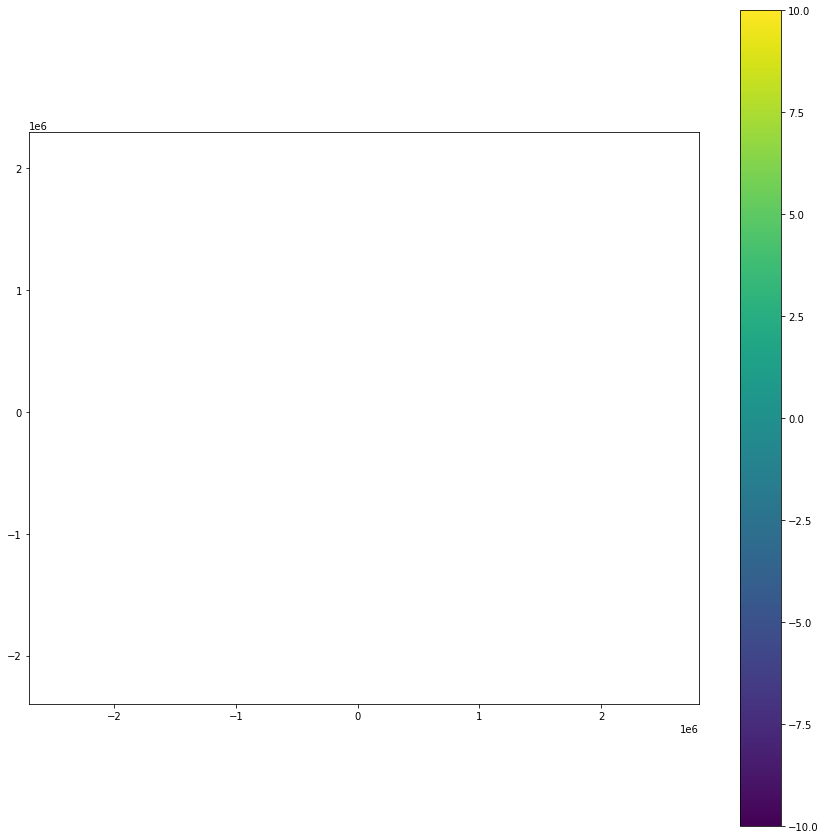

In [19]:
x_min = CS2SARIn_elev['x'].min()
x_max = CS2SARIn_elev['x'].max()
y_min = CS2SARIn_elev['y'].min()
y_max = CS2SARIn_elev['y'].max()

fig, ax = plt.subplots(figsize=(15,15))
ax.set_aspect('equal')
a = ax.imshow(CS2SARIn_elev['elevation'][2,:,:]-CS2SARIn_elev['elevation'][1,:,:], origin='lower', interpolation='none', extent=[x_min, x_max, y_min, y_max], vmin=-10, vmax=10)
plt.colorbar(a)
plt.show()